## P4DS (ODL1) Assignment 3

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020.11.03, revised 2021.03.02)

# _House Prices UK_


#### Student: Haseeb Akbar

#### Email: od21h2a@leeds.ac.uk

# Project Plan

## The Data (10 marks)

**What does this data show?**: This report provides an overview of sold house prices in the United Kingdom ranging from 1995 - 2017.

**Why is this important?**: 
- House prices are increasing at a ridiculous rate leaving more people priced out. 
- This may lead to more of us becoming a nation of renters as opposed to owners. 

Using the data below, to make an educated guess if now is a sensible time to buy, What type of property to buy and Where to the buy a property.

**Where has the data come from?**:
- The data is downloaded from Kaggle: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid.
- The user was called **HM Land Registry**, but their account does not exist.
- Luckily it references data released by HM Land Registry https://www.gov.uk/government/organisations/land-registry/about
    - Increasing the authenticity as released by the Government as opposed to a random entity. 
    
**Useful definitions**
- **HM Land Registry**: Is a department of the Government of the United Kingdom that registers ownership of property.
- **Property Transfer Deed**: A document which transfers ownership of the property from a seller to buyer.
- **New Built Property**: Is a property that has recently been built, or majorly reonvated within last two years and not been sold.
- **Freehold**: Is a type of ownership, where a person has "forever" ownership over the property. 
- **Leasehold** Is a form of property ownership where a property is leased from a freeholder.



**Breakdown of data**
- The dataset from Kaggle contains a total of 10 columns of property the property transactions. 
- There are 22,489,348 records of transactions!
- Data provided by HM Land Registry contains 16 columns which can be see on the table found under "Explanations of column headers in the PPD" header. https://www.gov.uk/guidance/about-the-price-paid-data

Columns are as follows:

**1. Transaction unique identifier (String)**: A unique reference which is recorded upon each sale. 
<br>
**2. Price (Int)**: The sale price which is stated on the property transfer dead. 
<br>
**3. Date of Transfer (String)**: Date the sale was completed, which is stated on the property transfer deed.
<br>
**4. Property Type (String)**: Property Type, D = Deatched, S = Semi-Detached, T = Terraced, F = Flats/Masionettes, O = Other 
<br>
**5. Old/New (String)**: Y=Newly built property, N=not newly built property
<br>
**6. Duration (String)**: Relates to the tenure: F = Freehold, L= Leasehold
<br>
**7. Town/City (String)**
<br>
**8. District (String)**
<br> 
**9. County (String)**
<br>
**10. PPDCategory Type**: Indicates the type of Price Paid transaction A,B.
- A = Standard Price Paid entry, includes single residential property sold for value.
- B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’.

**Notes**: 
- Not all these columns will be used in the analysis. The columns maybe dropped or cleaned.
- There were no nulls or missing values which meant preparing or cleansing data was much easier.
- Date of transfer is a string. Where to analyse date we need it in a date time or int format. 
- Date will be split by year and month both which will be casted a integer. This is so we can use it to a plot regression line later on to predict how much house prices will be in the future.




## Project Aim and Objectives (5 marks)

The overall aim of the project is to find out if it is worth purchasing a house now or later. 
There have been blackswan events in the past such as the **2008 housing crisis**. Which resulted is mortgage rates to increase, house prices to drop and many people losing their homes. 
- With the rate the government has been lending money due to covid 
- Rate at which house prices are increasing ("Possibly due to the stamp duty holiday")
- Salaries remaining the same

There seems a possibity we are in bubble.


In this report I will anaylse data provided by the HM Land Registry to find weather there is any relation between sold price and year sold. 
- Using linear regression to predict what house prices could be?
- Find the correlation coefficient between certain features of properties against price
- Display the .......

### Specific Objective(s)

* __Objective 1:__ _Get top 5 district for house sales_
* __Objective 2:__ _Predict cost of property more than 20 years from now average of these 5 districts_

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)

**Brief Explanation of following code cell**

- Importing pandas for data anlysis/maniuplation, creating and manuipulating dataframes.
- Importing matplotlib and seaborn for data visulation.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

**Brief Explanation of following code cell**

- The command **%%time** finds the wall time. This is the time taken from the start of the program to end of the program. As we are reading a massive dataset.
- HOUSE_PRICES_DF creates a dataframe from the CSV
- property_transactions_count finds the total number of rows in the frame and formats the number by 1000s by commas to make the number more readable.
- Prints number of rows returns to give feedback to the user.

**Note:** Please be patient when the running the code below as it's is creating a dataframe from millions of records!

In [2]:
%%time 

HOUSE_PRICES_DF = pd.read_csv("price_paid_records.csv")

property_transactions_count = '{:,}'.format(len(HOUSE_PRICES_DF))
print_text = f'There are {property_transactions_count} property transcations in the CSV!\nNo wonder it took so long!\n'
print(print_text)

There are 22,489,348 property transcations in the CSV!
No wonder it took so long!

Wall time: 26.9 s


**Brief Explanation of following code cell**

- Below is a simple test to see if our data was imported correctly. 
- This allows you to see visually the data you are working with
- In the below output, you can see the first five rows returned by the dataframe.
- by default .head() returns the first 5 records.
- This should result in 11 columns



In [3]:
HOUSE_PRICES_DF.head() # show first 5 records

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


**Brief Explanation of following code cell**

- Pandas has methods which allows to calculate the maximum and minimum values over the requested axis.
- But right now there other calculations provide no context.
- Prints max and min price back to user for the feedback. 

**Note**: There is a possiblity to use .describe() which returns count, mean , std, min etc. This will only return values for the price column as the other columns are string


In [4]:
max_price = '{:,}'.format(HOUSE_PRICES_DF["Price"].max())
min_price = '{:,}'.format(HOUSE_PRICES_DF["Price"].min())

print_text = f'The maximum a property sold for was £{max_price}!\nThe minimum a property a sold for was £{min_price} I missed out on a bargain :('
print(print_text)

The maximum a property sold for was £98,900,000!
The minimum a property a sold for was £1 I missed out on a bargain :(


**Brief Explanation of following code cell**

- This is part of data cleanses
- Check to see if there are any rows missing values
- Results show no missing values 

In [5]:
HOUSE_PRICES_DF.isnull().sum()

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

**Brief Explanation of following code cell**

- Create a new instance of the dataframe was don't want to mutate the original.
- Drop uneeded columns

In [6]:
CLEAN_HOUSE_PRICES_DF = HOUSE_PRICES_DF.copy() 

CLEAN_HOUSE_PRICES_DF.drop(columns = 'Transaction unique identifier', axis = 1, inplace = True)
CLEAN_HOUSE_PRICES_DF.drop(columns = 'Duration', axis = 1, inplace = True)
CLEAN_HOUSE_PRICES_DF.drop(columns = 'PPDCategory Type', axis = 1, inplace = True)
CLEAN_HOUSE_PRICES_DF.drop(columns = 'Record Status - monthly file only', axis = 1, inplace = True)

CLEAN_HOUSE_PRICES_DF.head()

,Price,Date of Transfer,Property Type,Old/New,Town/City,District,County
0,25000,1995-08-18 00:00,T,N,OLDHAM,OLDHAM,GREATER MANCHESTER
1,42500,1995-08-09 00:00,S,N,GRAYS,THURROCK,THURROCK
2,45000,1995-06-30 00:00,T,N,HIGHBRIDGE,SEDGEMOOR,SOMERSET
3,43150,1995-11-24 00:00,T,N,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE
4,18899,1995-06-23 00:00,S,N,WAKEFIELD,LEEDS,WEST YORKSHIRE


In [7]:
HOUSE_PRICES_DF.head() ## double check to see orignal df is not mutated

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


**Brief Explanation of following code cell**

- This is part of data cleanses
- Create new columns Year and Month and by "cutting" the strings and then converting to a int.
- Reason for converting to an int, is so we can use it as regression later.

In [8]:
CLEAN_HOUSE_PRICES_DF['Year'] = CLEAN_HOUSE_PRICES_DF['Date of Transfer'].str[:4].astype(int) # Need as int for regression 
CLEAN_HOUSE_PRICES_DF['Month'] = CLEAN_HOUSE_PRICES_DF['Date of Transfer'].str[5:7].astype(int) # Need as int for regression

CLEAN_HOUSE_PRICES_DF.head()

,Price,Date of Transfer,Property Type,Old/New,Town/City,District,County,Year,Month
0,25000,1995-08-18 00:00,T,N,OLDHAM,OLDHAM,GREATER MANCHESTER,1995,8
1,42500,1995-08-09 00:00,S,N,GRAYS,THURROCK,THURROCK,1995,8
2,45000,1995-06-30 00:00,T,N,HIGHBRIDGE,SEDGEMOOR,SOMERSET,1995,6
3,43150,1995-11-24 00:00,T,N,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,1995,11
4,18899,1995-06-23 00:00,S,N,WAKEFIELD,LEEDS,WEST YORKSHIRE,1995,6


## Objective 1: Get top 5 district for house sales


**Brief Explanation of following code cell**

- Step 1 find the total unique districts
- .unique returns unique values based on a hash table. This does not sort just returns based on appearance.
- len allows number of rows or unique districts

In [9]:
UNIQUE_DISTRICT = CLEAN_HOUSE_PRICES_DF['District'].unique()
UNIQUE_DISTRICT_COUNT = len(UNIQUE_DISTRICT)

print_text = f'There is a total of {UNIQUE_DISTRICT_COUNT} unique districts.'
print(print_text)

There is a total of 454 unique districts.


**Brief Explanation of following code cell**

- firstly create a new dataframe instance without mutating orginal dataframe.
- Only inserested in getting count of each district so we only pass the district columns
- Then loop through each row of the district and find the occurance of that district
- Filter orignal cleaned DF and count occurance of that disrict.

**Note**: When looping this add a tremendous strain. Which takes wall time to be atleast 6 minutes.

In [10]:
%%time
UNIQUE_DISTRICT_DF = pd.DataFrame(UNIQUE_DISTRICT, columns = ['District'])

for index, row in UNIQUE_DISTRICT_DF.iterrows():
    UNIQUE_DISTRICT_DF.loc[index, ['Count']] = (CLEAN_HOUSE_PRICES_DF['District'] == row['District']).sum()

UNIQUE_DISTRICT_DF.head()

## Takes atleast 6 minutes be patient 

Wall time: 6min 42s


,District,Count
0,OLDHAM,76576.0
1,THURROCK,69498.0
2,SEDGEMOOR,52762.0
3,NORTH BEDFORDSHIRE,2801.0
4,LEEDS,299133.0


**Brief Explanation of following code cell**

- Order by Count column by Desc so highest values appers first
- Similar to SQL ORDER BY Equivalent
- Will show top 5 distracts which are Birmngham, LEEDS, Bradford, Manchester, Sheffield

In [11]:
ORDERED_DISTRICTS = UNIQUE_DISTRICT_DF.sort_values(by=['Count'], ascending=False)

ORDERED_DISTRICTS.head(5) 

,District,Count
69,BIRMINGHAM,332091.0
4,LEEDS,299133.0
139,BRADFORD,198163.0
56,MANCHESTER,181363.0
15,SHEFFIELD,181222.0


**Brief Explanation of following code cell**

- Return top 5 rows from the ordered data frame
- Convert to list so we can use these values dynamically later on for filtering

In [12]:
DISTRICT_LIST = ORDERED_DISTRICTS.head(5)['District'].tolist()
DISTRICT_LIST

['BIRMINGHAM', 'LEEDS', 'BRADFORD', 'MANCHESTER', 'SHEFFIELD']

**Brief Explanation of following code cell**

- Filter by district column
- isin does an or comparrison of each element in the list
- equavlent to in() in SQL
- Filtered Districts now only contains rows from the top 5 districts

In [13]:
FILTERED_DISTRICTS = CLEAN_HOUSE_PRICES_DF[CLEAN_HOUSE_PRICES_DF['District'].isin(DISTRICT_LIST)]
FILTERED_DISTRICTS.head(5)

,Price,Date of Transfer,Property Type,Old/New,Town/City,District,County,Year,Month
4,18899,1995-06-23 00:00,S,N,WAKEFIELD,LEEDS,WEST YORKSHIRE,1995,6
16,34000,1995-07-31 00:00,S,N,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,7
20,76000,1995-01-18 00:00,D,N,LEEDS,LEEDS,WEST YORKSHIRE,1995,1
28,56000,1995-12-15 00:00,S,N,LEEDS,LEEDS,WEST YORKSHIRE,1995,12
31,47000,1995-09-18 00:00,T,N,LEEDS,LEEDS,WEST YORKSHIRE,1995,9


## Objective 2: Predict cost of property 20 years from now 2040 for these 5 districts

Linear regression is a predictive modelling technique that allows you to esitmate the relationship between two variables. 
In this case we will do a regression anlysis to predict values for price based on the year.

**How is regression calculated?**

In this case we will be using Linear regression.

$y = a + bx$
- y = estimated dependent score
- a = Is the y intercept 
- b = Slope
- x = indepent variable

$b = r * s_{x}/s_{y}$
- $r$ is pearson standard deviation coefficient
- standard deviation of y divided by standard deviation of x

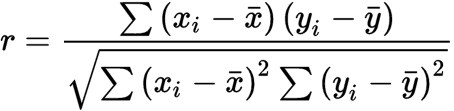

- $r$	=	correlation coefficient
- $x_{i}$	=	values of the x-variable in a sample
- $\bar{x}$	=	mean of the values of the x-variable
- $y_{i}$	=	values of the y-variable in a sample
- $\bar{y}$	=	mean of the values of the y-variable

**Example**

| Year (x) | Price (y) | (x - $\bar x$) | (y - $\bar y$) | (x - $\bar x$) * (y - $\bar y$) | (x - $\bar x$)$^{2}$ | (y - $\bar y$)$^{2}$ |
| :------------- | :------------- | :------------- | :------------- | :------------- | :------------- |:------------- | 
| 1995 | 20,000 | -2.5 | -25,000 | 62,500 | 6.25 | 625 * 10$^{6}$ | 
| 1996 | 30,000 | -1.5 | -15,000 | 22,500 | 2.25 | 506.25 * 10$^{6}$ | 
| 1997 | 40,000 | -0.5 | -5,000  | 2,500  | 0.25 | 6.25 * 10$^{6}$ |
| 1998 | 50,000 | 0.5  | 5,000   | 2,500  | 0.25 | 6.25 * 10$^{6}$ |
| 1999 | 60,000 | 1.5  | 15,000  | 22,500 | 2.25 | 506.25 * 10$^{6}$ |
| 2000 | 70,000 | 2.5  | 25.000  | 62,500 | 6.25 | 625 * 10$^{6}$ |
|  $\bar x$ = 1997.5    |   $\bar y$ = 45,000     |      |         |$$\sum_{}$$ = 175,000|$$\sum_{}$$ = 17.5 |$$\sum_{}$$ = 1.750 * 10$^{9}$|

$r = 175,000/\sqrt(17.5* 1.750 * 10^{9})$
<br>
$r = 1$

$b = r * s_{x}/s_{y}$
<br>
<br>
$s_{y} = \sqrt($$\sum_{}$$(y - $$\bar y)^{2} /(n - 1)$
<br>
<br>
= $\sqrt(1.750 * 10^{9})/(6 - 1)$
<br>
$= 18.7 * 10^{3}$
<br>

$s_{x} = \sqrt(17.5)/(6 - 1)$
<br>
$s_{x} = 1.87$
<br>

$b = 1 * 18700/1.87 = 10,000$ (slope)

<br> 

Y interecept 
<br>

$a = 45000 - (10,000 * 1997.5)$
<br>
$a = -19.93 * 10^6$

<br>

$y = a + bx$
<br>
$= -19.93 * 10 ^6 + 10,000 * x$
<br>

Predict house price for the year 2005

$y = -19.93 * 10^6 + 10,000 * 2005$
<br>
$y = £120,000$


In [129]:
PREDICT_HOUSE_PRICE_DF = FILTERED_DISTRICTS[['Price', 'Year']].copy()


column_1 = df["Price"]
column_2 = df["Year"]
correlation = column_1.corr(column_2)
correlation

0.968550307612512

In [130]:
def getHousePrice(df, year):
    ## reset index as want to return dataframe not series back
    df = df.groupby(['Year'])['Price'].mean().reset_index()
    xMean = df['Year'].mean()
    yMean = df['Price'].mean()
    
    df['x-meanx'] = df.apply(lambda row: row.Year - xMean, axis=1)
    df['y-meany'] = df.apply(lambda row: row.Price - yMean, axis=1)
    
    df['x-meanx_multiply_y-meany'] = df.apply(lambda row: row['x-meanx'] * row['y-meany'], axis=1)
    
    df['x-meanx_squared'] = df.apply(lambda row: row['x-meanx']**2, axis=1)
    df['y-meany_squared'] = df.apply(lambda row: row['y-meany']**2, axis=1)
    
    sum_x_mean_x_multiply_y_mean_y = df['x-meanx_multiply_y-meany'].sum()
    sum_x_mean_x_squared = df['x-meanx_squared'].sum()
    sum_y_mean_y_squared = df['y-meany_squared'].sum()
    
    correlationCoeffiecient = sum_x_mean_x_multiply_y_mean_y /   math.sqrt(sum_x_mean_x_squared*sum_y_mean_y_squared)
    numberOfRecords = df['Price'].count()
    
    sx = math.sqrt(sum_x_mean_x_squared/(numberOfRecords-1))
    sy = math.sqrt(sum_y_mean_y_squared/(numberOfRecords-1))
    
    b = correlationCoeffiecient * (sy/sx)
    a = yMean - (b*xMean)
    
    return a + b * year
    

getHousePrice(PREDICT_HOUSE_PRICE_DF, 2016)

0.9685503076125118

In [112]:
df = PREDICT_HOUSE_PRICE_DF.groupby(['Year'])['Price'].mean().reset_index()
df['price_predict'] = df.apply(lambda row: getHousePrice(PREDICT_HOUSE_PRICE_DF, row['Year']), axis=1)
df

,Year,Price,price_predict
0,1995,51762.603226,41866.997015
1,1996,53090.729918,49933.337833
2,1997,55899.274660,57999.678652
3,1998,59606.710410,66066.019470
4,1999,63785.908238,74132.360289
5,2000,70036.363255,82198.701107
6,2001,78091.664379,90265.041926
7,2002,92067.392798,98331.382744
8,2003,110943.944115,106397.723563
9,2004,128741.510000,114464.064382


In [127]:
years = np.arange(1995, 2081, 1)
predict_df = pd.DataFrame(data=years, columns=['Year'])

predict_df['price_predict'] = predict_df.apply(lambda row: getHousePrice(PREDICT_HOUSE_PRICE_DF, row['Year']), axis=1)
predict_df.tail()

,Year,price_predict
81,2076,695240.603316
82,2077,703306.944135
83,2078,711373.284953
84,2079,719439.625772
85,2080,727505.966590


# Project Outcome (10 + 10 marks)

## Overview of Results

# Objective 1: Get top 5 district for house sales

**Objective 1**: Was to get the top 5 districts for house sales. Based on number of transactions.

These were 
- Birmngham - 1.149 Million 2019
- Leeds - 792,525 2019
- Bradford - 536,986 2019
- Manchester - 2,710,000 2019
- Sheffield - 725,000 2019

At first I was suprised to see Bradford in the list as thought it was much smaller city!

Below you can see combined housing prices of the top 5 distrcits combined. 
- Reason I chosed top 5, was there would have more transactions. So sample size would be greater and able to gather more meaniful data. For example if a district only had 5 sales and one sale was for £200,000 and another for £1 this would massively skew results 
- You can see that the general pattern is that house prices are increasing. 
- In 2008 to about 2012 house prices fell short. Can make a logical guess it was related to housing bubble or market crash of 2008.
- Even if you bought at 2008 and didn't sell you would still be massively in the green.
- 2008 you bought for 175,000 and now its 2015 same house is going for over 200k percent increase.

**concerns**
- You can the "shadow" is greater. represents the confidence interval of the estimate
- This is getting greater as times go on.
- Meaning there exteremes between high and low properties are increasing.


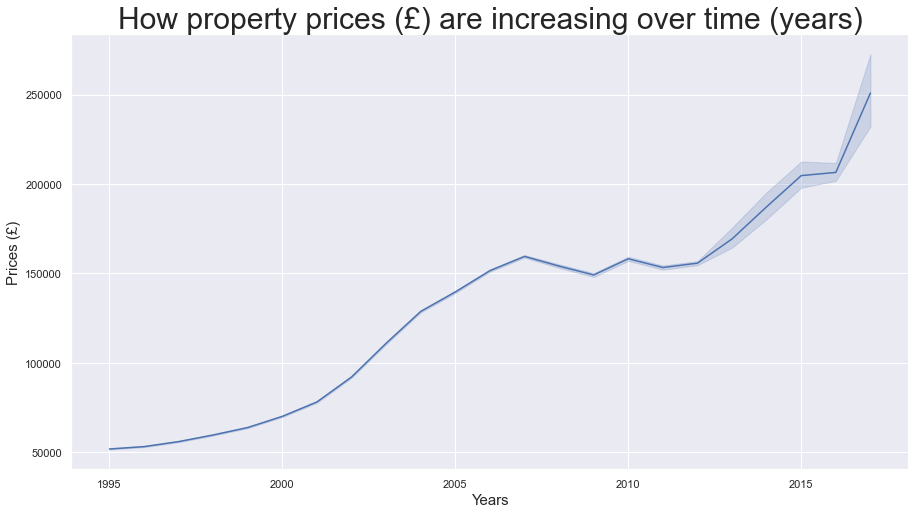

In [143]:
plt.figure(figsize=(15,8)) #A tuple containing width and height for the figure in inches 

sns.set_theme(style="darkgrid") # I like the darkgrid theme!
plot = sns.lineplot(x='Year', y='Price', data=FILTERED_DISTRICTS) #To display the Year and Price columns from the dataframe

plot.axes.set_title("How property prices (£) are increasing over time (years)",fontsize=30) #Set's title of the plot
plot.set_xlabel("Years",fontsize=15) # Set's x axis subtitle for the plot
plot.set_ylabel("Prices (£)",fontsize=15) # Set's y axis subtitle for the plot

plt.show() # shows the plot

Next want to split by distrcit
- As property sales might be affected by the districts
- Below you can Leeds, Sheffield, Manchester all follow very similar patterns. In terms of agression in the increase of prices
- However you can see Bradford property prices have stayed stagnant since 2008. 
- This shows Bradford is not a good city to group the other 4 cities by.
- As you can see on the Graph above beyond 2008 and the confidence interval of truth gets greater.
- This is when Bradford prices per transaction stagnanted, which proves the graph doesn't show the whole story.

**Note**: Below I chose to ignore CI, which ignores the confidence interanl. As it would have made the data hard to see.

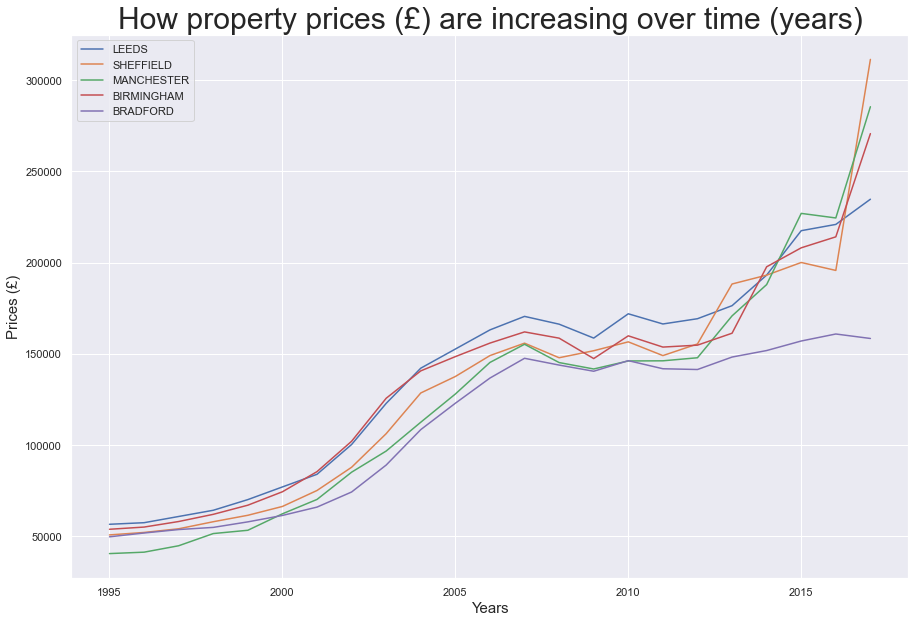

In [145]:
plt.figure(figsize=(15,10)) #A tuple containing width and height for the figure in inches 
sns.set_theme(style="darkgrid") # I like the darkgrid theme!

plot = sns.lineplot(x='Year', y='Price', hue='District', data=FILTERED_DISTRICTS, ci= None) # To display the Year and Price columns from the dataframe

plot.axes.set_title("How property prices (£) are increasing over time (years)",fontsize=30) #Set's title of the plot
plot.set_xlabel("Years",fontsize=15) # Set's x axis subtitle for the plot
plot.set_ylabel("Prices (£)",fontsize=15) # Set's y axis subtitle for the plot

plt.legend(loc='upper left') # Moves the legend to top left to not overlap the data

plt.show() # shows the plot

## Objective 2: Predict the cost of property

**Objective 2**: Was to predict the cost of property in the future using data from the districts
- Birmngham
- Leeds
- Bradford
- Manchester
- Sheffield

It made logical sense to use the regplot visualtion on seaborn to predict what prices would be.
This would draw a trendline showing future prices agaisnt years.

only one issue, the blue line does really show much.
This might be skewed due to the extremes of the highs and lows.

Maybe if reduce the years of prices.

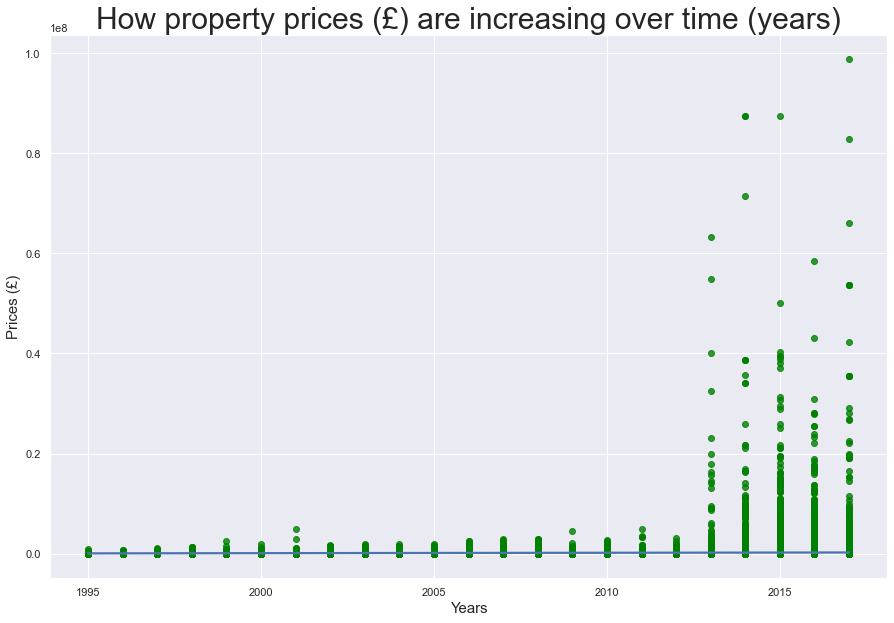

In [148]:
plt.figure(figsize=(15,10)) #A tuple containing width and height for the figure in inches 
sns.set_theme(style="darkgrid") # I like the darkgrid theme!

plot = sns.regplot(x = "Year", y = "Price", data = FILTERED_DISTRICTS, scatter_kws={"color": "green"}) # To display the Year and Price columns from the dataframe

plot.axes.set_title("How property prices (£) are increasing over time (years)",fontsize=30) #Set's title of the plot
plot.set_xlabel("Years",fontsize=15) # Set's x axis subtitle for the plot
plot.set_ylabel("Prices (£)",fontsize=15) # Set's y axis subtitle for the plot

plt.show() # shows the plot

No luck!

Which shows that putting all the data into the regplot doesn't allow us to predict. 

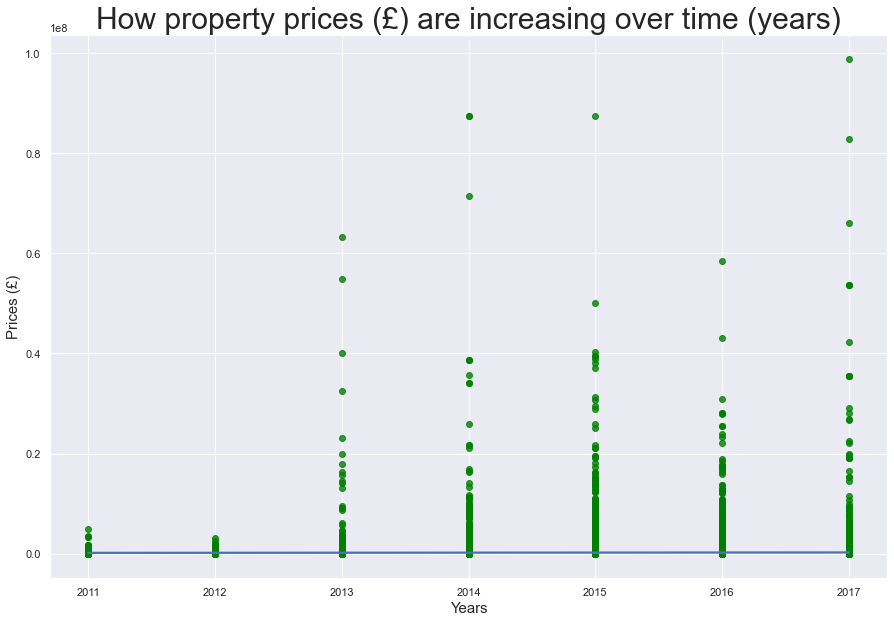

In [149]:
plt.figure(figsize=(15,10)) #A tuple containing width and height for the figure in inches 
sns.set_theme(style="darkgrid") # I like the darkgrid theme!

plot = sns.regplot(x = "Year", y = "Price", data = FILTERED_DISTRICTS[FILTERED_DISTRICTS["Year"]>2010], scatter_kws={"color": "green"}) # To display the Year and Price columns from the dataframe

plot.axes.set_title("How property prices (£) are increasing over time (years)",fontsize=30) #Set's title of the plot
plot.set_xlabel("Years",fontsize=15) # Set's x axis subtitle for the plot
plot.set_ylabel("Prices (£)",fontsize=15) # Set's y axis subtitle for the plot

plt.show() # shows the plot

So it made sense to group by district and get the mean.
So average of each district was added by price.

On a general notice you can see prices are going up.

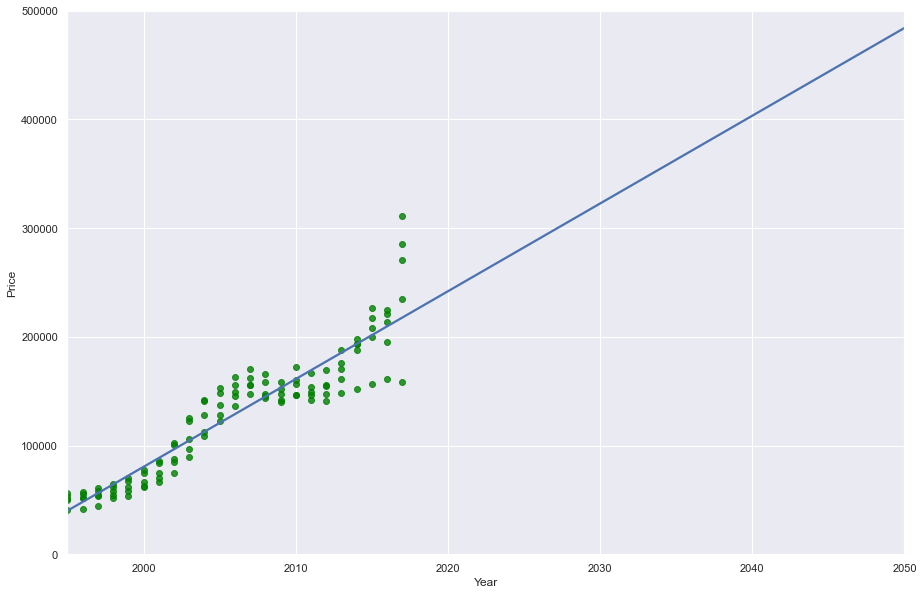

In [73]:
MEAN_BY_YEAR = FILTERED_DISTRICTS.groupby(['Year', 'District'])['Price'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
plt.xlim(1995, 2050)
plt.ylim(0, 500000)
sns.regplot(x = "Year", y = "Price",  data = MEAN_BY_YEAR, scatter_kws={"color": "green"}, ci=None, truncate=False)

plt.show()

You can see that price and year are very closely correlated. 
This means that future prices are very likely to follow this pattern.
Not guranteed but likely possiblity!

In [74]:
MEAN_BY_YEAR['Price'].corr(MEAN_BY_YEAR['Year'])


0.9297678586968369

Conclusion (5 marks)
Your concluding section should be around 200-400 words. It is recommended that you divide it into the following sections._

Acheivements
As we had expected, the most popular fridge magnets were of the 'meme' kind. We were surprised that 'smiley' fridge magnets were less common than expected. We conjecture that this is because, although they are apparently very popular, few fridges display more than one smiley. However, 'meme' based magnets can be found in large numbers, even on quite small fridges.

Limitations
The project was limited to a small number of fridge magents, which may not be typical of fridges found in the global fridge magnet ecosystem.

Future Work
In future work we would like to obtain more diverse data and study fridge magnets beyond the limited confines of student accomodation. We hypothesise that there could be a link between fridge magnet types and social class and/or educational achievement